# Capstone Part 3: Solar data only
## By Elizabeth Tyree


### Problem Statement:
### Can the occurrence of sunspots be used to predict the frequency of earthquakes?

## Overall Capstone Outline (I am aware some datasets maybe missing data)

Part 1 | Problem Statement: Can the occurrence of sunspots be used to predict the frequency of earthquakes?

Part 2: Get Data (Data Wrangling)
-> Data Sources
-> What kind of data ( was it a csv, a paper file, an image, etc?)
-> Example: I got my data from the Cenciuos, my first data set was a million rows, that included these key features..)

Part 3: Data Preparation (Data cleaning\Munging)
-> Explain what you did to your data and why.
-> Plots show people all about your data!

Part 4: 	Model building
-> Standardize your data
-> Cross Validation OR Train Test Split
-> I chose this model because…..etc. (explain why you choose your model)
-> What are you trying to predict and why?

Part 5: Modeling (In no particular order)
-> RNN
-> ARIMA
-> SARIMA (ARIMA for seasonal data)

Part 6: Evaluation/Evaluation of Modeling 
-> Scores (amount of error or the amount of variance)
-> Fourier Transform, look at both the data and the predictions in the frequency domain.
-> What are the most important features?
-> Feature importances
-> And plot the most important features!!!!!
-> Errors and Error Directionality
-> Conclusions
-> Recommendations
-> Next steps if you had more time etc. Then come back to your conclusions slide and end with that slide! OR Create two slides, 1 for conclusions of the models and the 2nd for you presentation conclusions.)


## In Depth Outline

Part 1: Data Summary | Datasets in possession 

-> The Centennial catalog from the USGS, contains earthquakes from 1900 to 2007.

    Data Format: *.csv
    Features: icat, msc1, mdo1, yr, mon, Day, hr, Min, sec, glat, glon, dep, greg, ntel, mag1, Fract_Year
    Date Range: 01/01/1903 to 09/30/2007
    
-> Reviewed Earthquakes data from the USGS 1900-2016 all magnitudes.
    
    Data Format: *.csv
    Features: time, latitude, longitude, depth, mag, magType, nst, gap, dmin, rms, net, id, updated, place, type, 
    horizontalError, depthError, magError, magNst, status, locationSource, magSource
    Date Range: 1900-2016
    
-> International Seismological Centre (ISC) catalog of earthquakes from 1900 to 2016.

    Data Format: *.csv
    Features: 
    Date Range: 1900-2016
    
-> Preliminary Determination of Epicenters or PDE. 
“We use the word "Preliminary" for our final bulletin because the Bulletin of the International Seismological Centre is considered to be the final global archive of parametric earthquake data, in other words phase arrival (“pick”) times and amplitudes.”
    
    Data Format: *.csv
    Features: Date, ZTime, net, Year, Month, FracYear, Secs_from1973, latitude, longitude, mag
    Date Range: 1900-2016

-> Geomagnetic Data

    Data Format: *.csv  and *.txt for hourly data, *.out for minute data.
    Date Range: 01/01/1958 to 2007/12/31 for hourly data, 01/01/1985 to 12/31/2007 14:40pm.
    Features: 
    -> Four hourly data: Year, Mon, Day, Hr, min, sec, DOYfromstart, FractionalDOY, Fractionalyear, Dst, HER, KAK, HON, SJG, sigma 
    -> For minute data: 






In [27]:
import numpy as np
import pandas as pd
import patsy

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor

from pprint import pprint

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import ast
import datetime as dt
from datetime import timedelta
from datetime import datetime as dt2
import time
#from datetime import now

#jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10 # Use this at the command line to expand rate limit!
# or the function prep_posts may not work properly.
plt.style.use('fivethirtyeight')

pd.set_option('display.max_columns', None) 
%matplotlib inline

In [28]:
# Loading the ISSN_D_tot data, these are the daily sunspot numbers.
my_cols_d = ['Year','Month','Day','Frac_Year','Daily_Sun_Spot_Number', 'Flag'] # The file does not contain headers.

ISSN_D_tot = pd.read_csv('./data/ISSN_D_tot.csv',names=my_cols_d, engine='python')

In [29]:
ISSN_D_tot = pd.DataFrame(ISSN_D_tot)

In [30]:
ISSN_D_tot.head()

,Year,Month,Day,Frac_Year,Daily_Sun_Spot_Number,Flag
0,1818,1,1,1818.004,-1,1
1,1818,1,2,1818.007,-1,1
2,1818,1,3,1818.010,-1,1
3,1818,1,4,1818.012,-1,1
4,1818,1,5,1818.015,-1,1


In [31]:
ISSN_D_tot.tail()

,Year,Month,Day,Frac_Year,Daily_Sun_Spot_Number,Flag
72007,2015,2,24,2015.149,28,0
72008,2015,2,25,2015.151,13,0
72009,2015,2,26,2015.154,16,0
72010,2015,2,27,2015.157,38,0
72011,2015,2,28,2015.159,41,0


In [32]:
ISSN_D_tot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72012 entries, 0 to 72011
Data columns (total 6 columns):
Year                     72012 non-null int64
Month                    72012 non-null int64
Day                      72012 non-null int64
Frac_Year                72012 non-null float64
Daily_Sun_Spot_Number    72012 non-null int64
Flag                     72012 non-null int64
dtypes: float64(1), int64(5)
memory usage: 3.3 MB


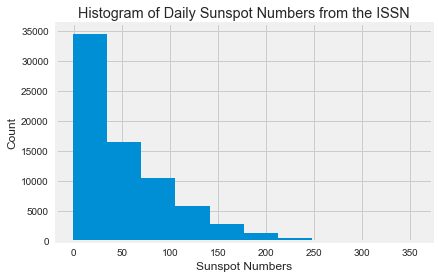

In [33]:
# Histogram of Daily Sunspot Numbers from the ISSN.
#bin_size = 0.5
#n_bins = 10/bin_size


plt.hist(ISSN_D_tot['Daily_Sun_Spot_Number'])    
# Add title and axis names
plt.title('Histogram of Daily Sunspot Numbers from the ISSN')
plt.xlabel('Sunspot Numbers') #Default is 10 bins
plt.ylabel('Count')
#plt.xlim(0,10)

# Show graphic
plt.show()

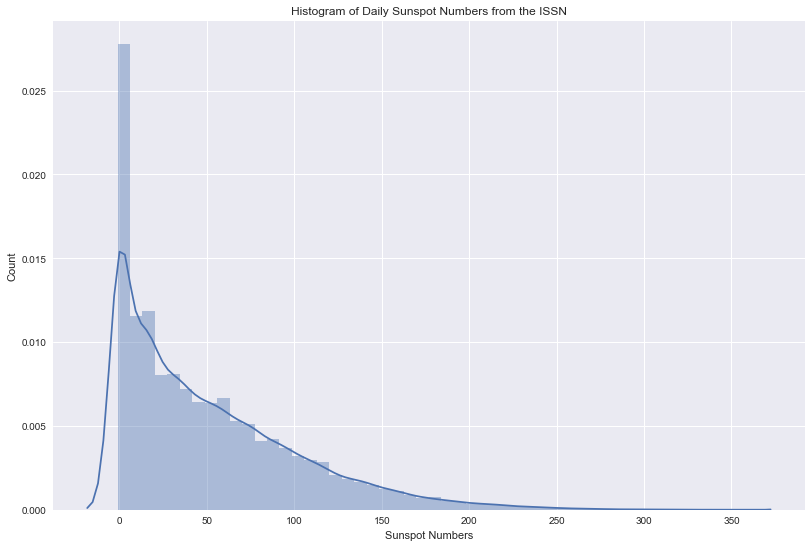

In [34]:
sns.set(rc={'figure.figsize':(12,9)})
f,ax = plt.subplots()
sns.distplot(ISSN_D_tot['Daily_Sun_Spot_Number'], bins=50, axlabel ='Sunspot Numbers')
ax.set_title('Histogram of Daily Sunspot Numbers from the ISSN')
ax.set_xlabel('Sunspot Numbers');
ax.set_ylabel('Count');

In [35]:
pd.crosstab(index=ISSN_D_tot['Daily_Sun_Spot_Number'],  # Make a crosstab
                      columns="count")      # Name the count column

col_0,count
Daily_Sun_Spot_Number,
-1,3247
0,10551
1,25
2,64
3,140
4,82
5,63
6,79
7,1212


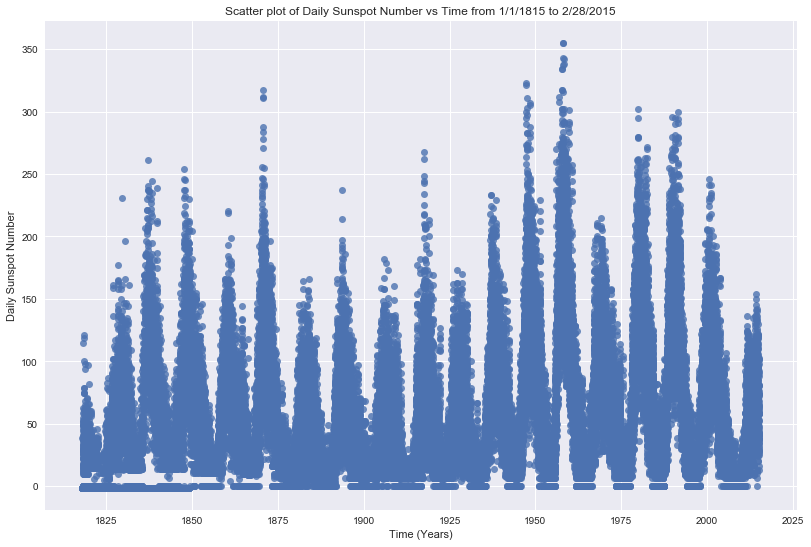

In [36]:
# Scatter plot of Daily Sunspot Numbers vs. Time
 
# Without regression fit:
f,ax = plt.subplots()
sns.regplot(x=ISSN_D_tot['Frac_Year'], y=ISSN_D_tot['Daily_Sun_Spot_Number'], fit_reg=False, ax = ax)
ax.set_title('Scatter plot of Daily Sunspot Number vs Time from 1/1/1815 to 2/28/2015')
ax.set_xlabel('Time (Years)');
ax.set_ylabel('Daily Sunspot Number');

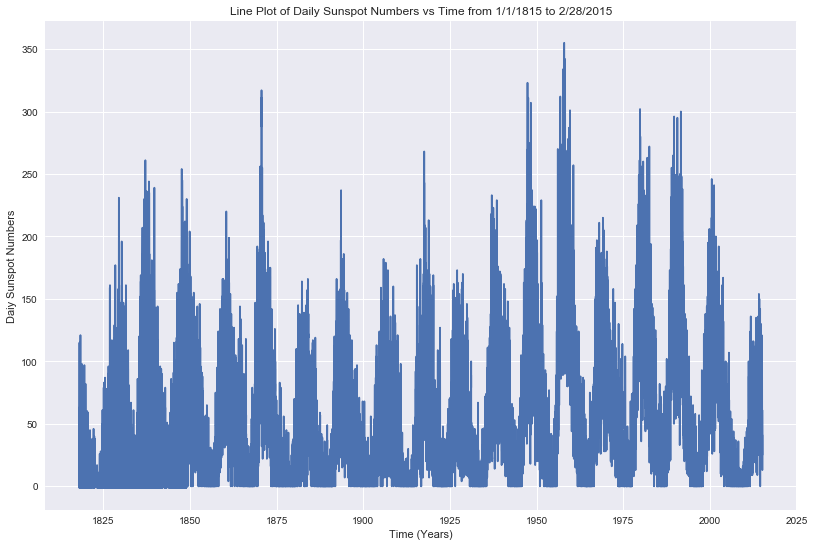

In [37]:
# use the plot function
plt.plot(ISSN_D_tot['Frac_Year'],ISSN_D_tot['Daily_Sun_Spot_Number'])
# Add title and axis names
plt.title('Line Plot of Daily Sunspot Numbers vs Time from 1/1/1815 to 2/28/2015')
plt.xlabel('Time (Years)') #Default is 10 bins
plt.ylabel('Daiy Sunspot Numbers')
#plt.xlim(0,10)

# Show graphic
plt.show()

In [38]:
# Loading the ISSN_M_tot data, these are the Monthly sunspot numbers.
my_cols_m = ['Year','Month','Frac_Year','Monthly_Sun_Spot_Number','Flag1' ,'Smoothed_Monthly','Flag2'] # The file does not contain headers.

ISSN_M_tot = pd.read_csv('./data/ISSN_M_tot.csv',names=my_cols_m, engine='python')

In [39]:
ISSN_M_tot.head()

,Year,Month,Frac_Year,Monthly_Sun_Spot_Number,Flag1,Smoothed_Monthly,Flag2
0,1749,1,1749.049,58.0,1,-1.0,1
1,1749,2,1749.129,62.6,1,-1.0,1
2,1749,3,1749.210,70.0,1,-1.0,1
3,1749,4,1749.294,55.7,1,-1.0,1
4,1749,5,1749.377,85.0,1,-1.0,1


In [40]:
ISSN_M_tot.tail()

,Year,Month,Frac_Year,Monthly_Sun_Spot_Number,Flag1,Smoothed_Monthly,Flag2
3189,2014,10,2014.790,60.6,0,-1.0,0
3190,2014,11,2014.873,70.1,0,-1.0,0
3191,2014,12,2014.957,78.0,0,-1.0,0
3192,2015,1,2015.042,67.0,0,-1.0,0
3193,2015,2,2015.123,44.8,0,-1.0,0


In [41]:
ISSN_M_tot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3194 entries, 0 to 3193
Data columns (total 7 columns):
Year                       3194 non-null int64
Month                      3194 non-null int64
Frac_Year                  3194 non-null float64
Monthly_Sun_Spot_Number    3194 non-null float64
Flag1                      3194 non-null int64
Smoothed_Monthly           3194 non-null float64
Flag2                      3194 non-null int64
dtypes: float64(3), int64(4)
memory usage: 174.8 KB


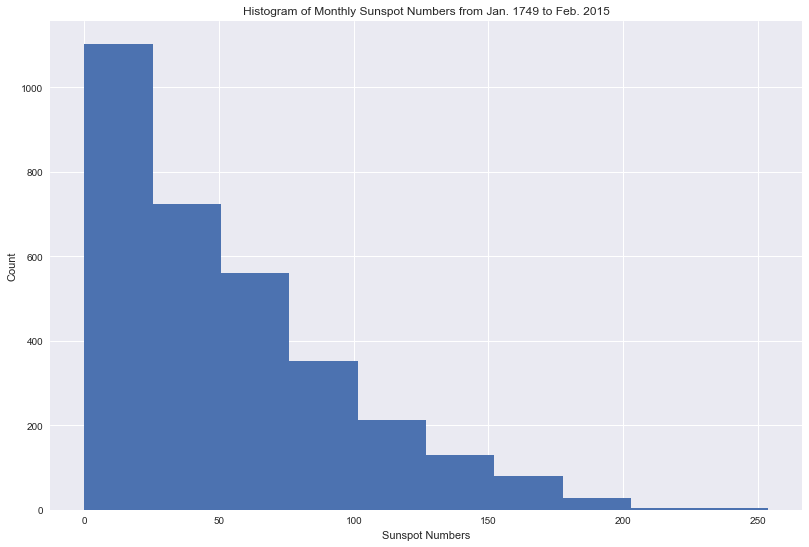

In [42]:
# Histogram of Daily Sunspot Numbers from the ISSN.
#bin_size = 0.5
#n_bins = 10/bin_size


plt.hist(ISSN_M_tot['Monthly_Sun_Spot_Number'])    
# Add title and axis names
plt.title('Histogram of Monthly Sunspot Numbers from Jan. 1749 to Feb. 2015')
plt.xlabel('Sunspot Numbers') #Default is 10 bins
plt.ylabel('Count')
#plt.xlim(0,10)

# Show graphic
plt.show()

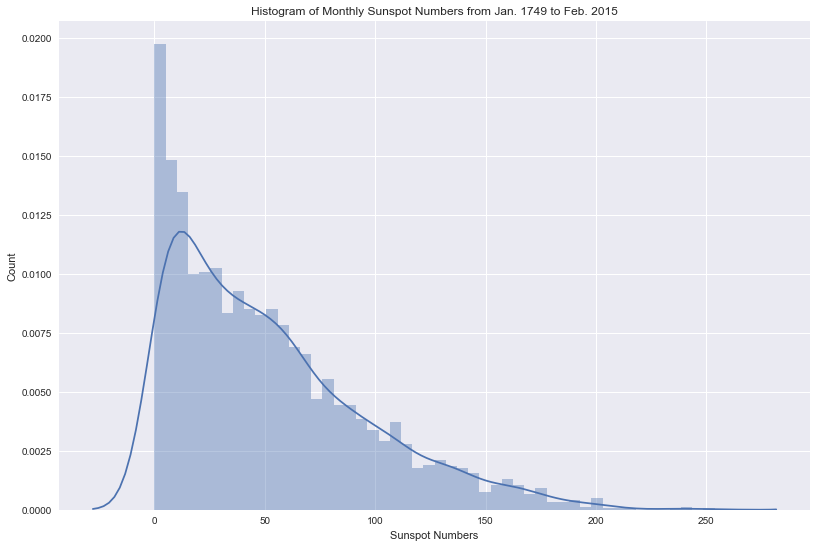

In [43]:
sns.set(rc={'figure.figsize':(12,9)})
f,ax = plt.subplots()
sns.distplot(ISSN_M_tot['Monthly_Sun_Spot_Number'], bins=50, axlabel ='Sunspot Numbers')
ax.set_title('Histogram of Monthly Sunspot Numbers from Jan. 1749 to Feb. 2015')
ax.set_xlabel('Sunspot Numbers');
ax.set_ylabel('Count');

In [44]:
pd.crosstab(index=ISSN_M_tot['Monthly_Sun_Spot_Number'],  # Make a crosstab
                      columns="count")      # Name the count column

col_0,count
Monthly_Sun_Spot_Number,
0.0,67
0.1,2
0.2,8
0.3,7
0.4,4
0.5,10
0.6,5
0.7,5
0.8,7


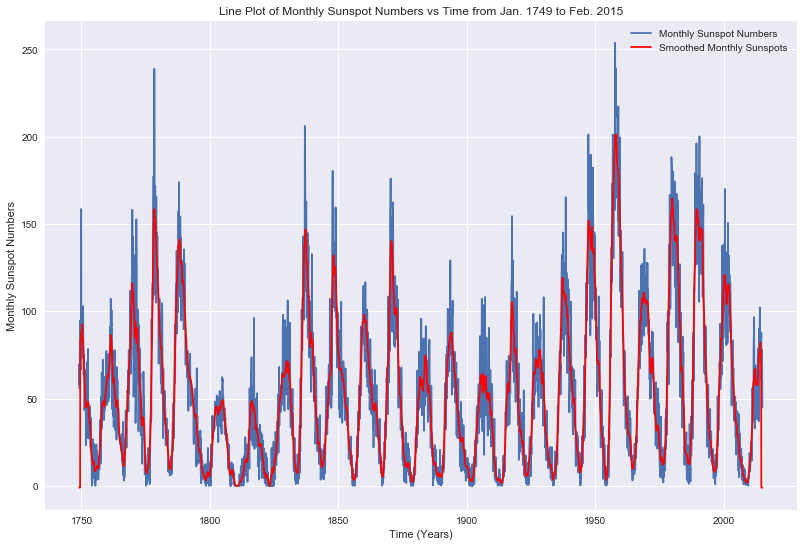

In [56]:
# use the plot function
plt.plot(ISSN_M_tot['Frac_Year'],ISSN_M_tot['Monthly_Sun_Spot_Number'],label='Monthly Sunspot Numbers')
plt.plot(ISSN_M_tot['Frac_Year'],ISSN_M_tot['Smoothed_Monthly'],'r-',label='Smoothed Monthly Sunspots')

# Add title and axis names
plt.title('Line Plot of Monthly Sunspot Numbers vs Time from Jan. 1749 to Feb. 2015')
plt.xlabel('Time (Years)') #Default is 10 bins
plt.ylabel('Monthly Sunspot Numbers')
#plt.xlim(0,10)
plt.legend()
# Show graphic
plt.show()

In [46]:
# Loading the ISSN_M_tot data, these are the Monthly sunspot numbers.
my_cols_y = ['Frac_Year','Yearly_Sun_Spot_Number','Flag'] # The file does not contain headers.

ISSN_Y_tot = pd.read_csv('./data/ISSN_Y_tot.csv',names=my_cols_y, engine='python')

In [47]:
ISSN_Y_tot.head()

,Frac_Year,Yearly_Sun_Spot_Number,Flag
0,1700.5,5.0,1
1,1701.5,11.0,1
2,1702.5,16.0,1
3,1703.5,23.0,1
4,1704.5,36.0,1


In [48]:
ISSN_Y_tot.tail()

,Frac_Year,Yearly_Sun_Spot_Number,Flag
310,2010.5,16.5,1
311,2011.5,55.7,1
312,2012.5,57.7,1
313,2013.5,64.9,1
314,2014.5,79.0,0


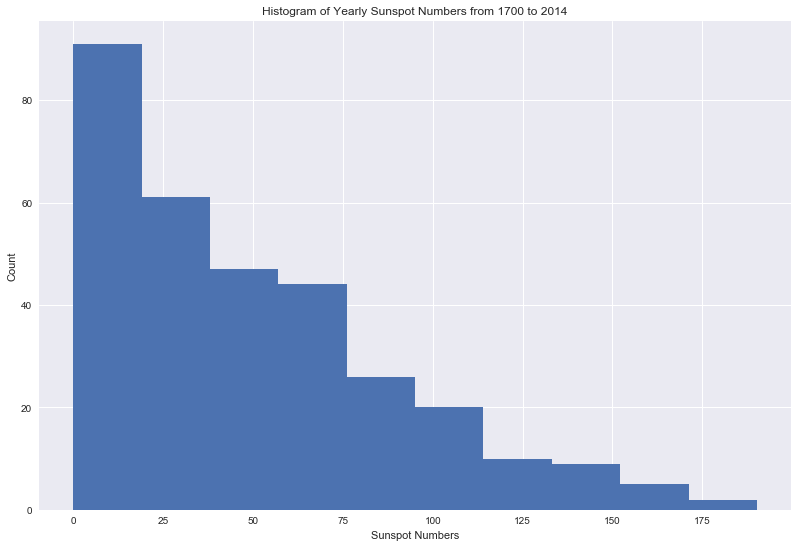

In [49]:
# Histogram of Daily Sunspot Numbers from the ISSN.
#bin_size = 0.5
#n_bins = 10/bin_size


plt.hist(ISSN_Y_tot['Yearly_Sun_Spot_Number'])    
# Add title and axis names
plt.title('Histogram of Yearly Sunspot Numbers from 1700 to 2014')
plt.xlabel('Sunspot Numbers') #Default is 10 bins
plt.ylabel('Count')
#plt.xlim(0,10)

# Show graphic
plt.show()

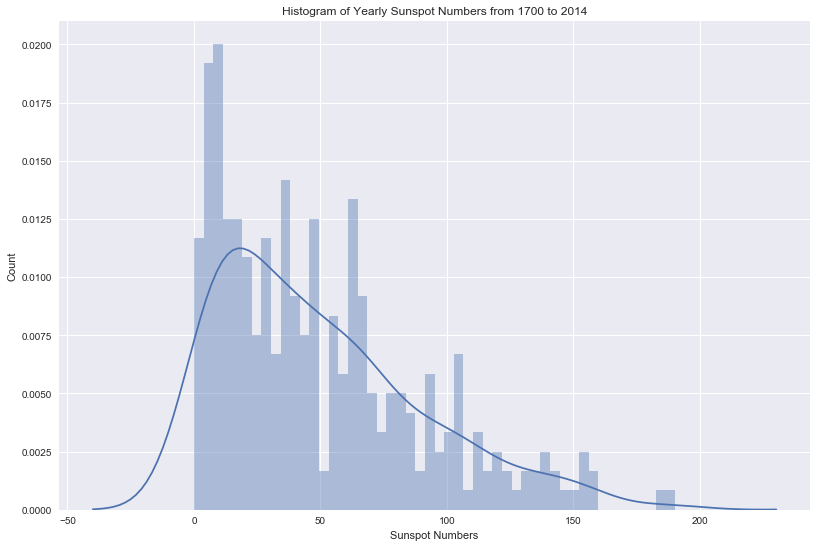

In [50]:
sns.set(rc={'figure.figsize':(12,9)})
f,ax = plt.subplots()
sns.distplot(ISSN_Y_tot['Yearly_Sun_Spot_Number'], bins=50, axlabel ='Sunspot Numbers')
ax.set_title('Histogram of Yearly Sunspot Numbers from 1700 to 2014')
ax.set_xlabel('Sunspot Numbers');
ax.set_ylabel('Count');

In [51]:
pd.crosstab(index=ISSN_Y_tot['Yearly_Sun_Spot_Number'],  # Make a crosstab
                      columns="count")      # Name the count column

col_0,count
Yearly_Sun_Spot_Number,
0.0,3
1.4,2
1.8,1
2.0,1
2.5,1
2.7,1
2.9,1
3.0,1
3.1,1


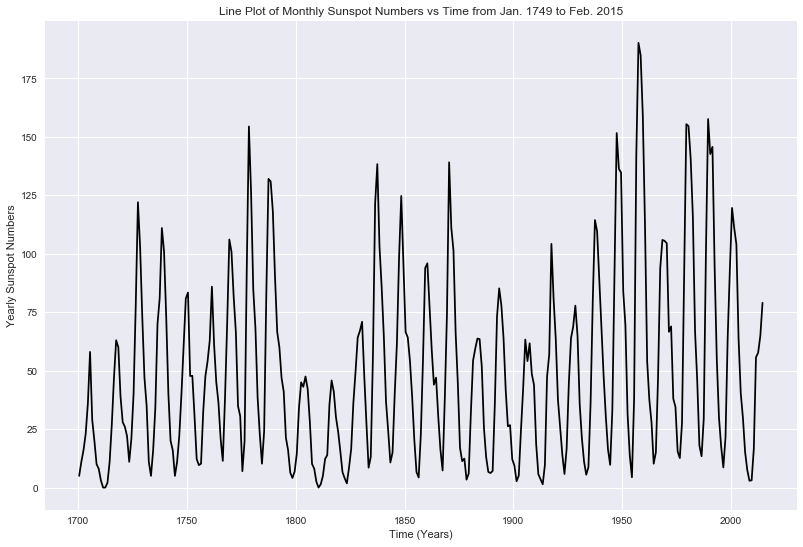

In [69]:
# use the plot function
plt.plot(ISSN_Y_tot['Frac_Year'],ISSN_Y_tot['Yearly_Sun_Spot_Number'],'k-')

# Add title and axis names
plt.title('Line Plot of Monthly Sunspot Numbers vs Time from Jan. 1749 to Feb. 2015')
plt.xlabel('Time (Years)') #Default is 10 bins
plt.ylabel('Yearly Sunspot Numbers')
#plt.xlim(0,10)

# Show graphic
plt.show()

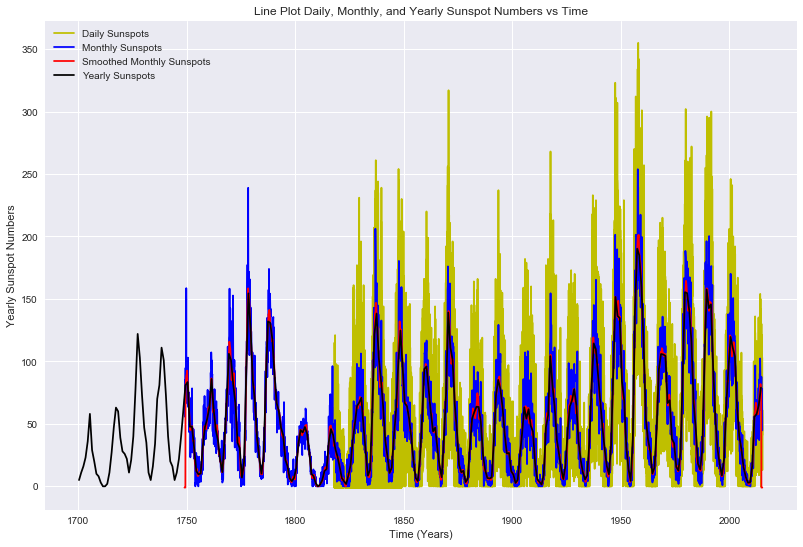

In [68]:
# use the plot function
plt.plot(ISSN_D_tot['Frac_Year'],ISSN_D_tot['Daily_Sun_Spot_Number'],'y-',label='Daily Sunspots')
plt.plot(ISSN_M_tot['Frac_Year'],ISSN_M_tot['Monthly_Sun_Spot_Number'],'b-',label='Monthly Sunspots')
plt.plot(ISSN_M_tot['Frac_Year'],ISSN_M_tot['Smoothed_Monthly'],'r-',label='Smoothed Monthly Sunspots')
plt.plot(ISSN_Y_tot['Frac_Year'],ISSN_Y_tot['Yearly_Sun_Spot_Number'],'k-',label='Yearly Sunspots')

# Add title and axis names
plt.title('Line Plot Daily, Monthly, and Yearly Sunspot Numbers vs Time')
plt.xlabel('Time (Years)') #Default is 10 bins
plt.ylabel('Yearly Sunspot Numbers')
#plt.xlim(0,10)

plt.legend()
# Show graphic
plt.show()

In [14]:
# Loading the The Preliminary Determination of Epicenters (PDE) USGS data
pde = pd.read_csv('./data/EQ_pde.csv')

In [15]:
pde = pd.DataFrame(pde)

In [16]:
pde.shape

(586409, 10)

In [17]:
pde.head()

,Date,ZTime,net,Year,Month,FracYear,Secs_from1973,latitude,longitude,mag
0,01-01-1973,03:46:09,pde,1973,1,1973.076923,13569,-9.214,150.634,5.3
1,01-01-1973,05:22:29,pde,1973,1,1973.076923,19349,-15.012,-173.958,5.0
2,01-01-1973,09:28:57,pde,1973,1,1973.076923,34137,-22.161,-65.792,4.8
3,01-01-1973,21:35:58,pde,1973,1,1973.076923,77758,13.897,-44.876,4.4
4,01-01-1973,21:41:17,pde,1973,1,1973.076923,78077,13.743,-45.266,4.4


In [18]:
pde.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586409 entries, 0 to 586408
Data columns (total 10 columns):
Date             586409 non-null object
ZTime            586409 non-null object
net              586409 non-null object
Year             586409 non-null int64
Month            586409 non-null int64
FracYear         586409 non-null float64
Secs_from1973    586409 non-null int64
latitude         586409 non-null float64
longitude        586409 non-null float64
mag              586409 non-null float64
dtypes: float64(4), int64(3), object(3)
memory usage: 44.7+ MB


In [19]:
pde.isnull().sum()

Date             0
ZTime            0
net              0
Year             0
Month            0
FracYear         0
Secs_from1973    0
latitude         0
longitude        0
mag              0
dtype: int64

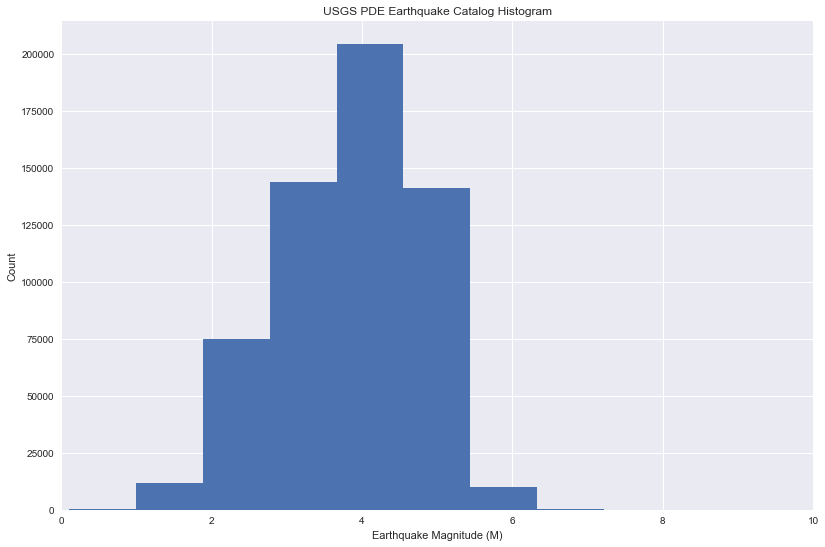

In [20]:
# Histogram 
bin_size = 0.5
n_bins = 10/bin_size


plt.hist(pde['mag'])    
# Add title and axis names
plt.title('USGS PDE Earthquake Catalog Histogram')
plt.xlabel('Earthquake Magnitude (M)') #Default is 10 bins
plt.ylabel('Count')
plt.xlim(0,10)

# Show graphic
plt.show()


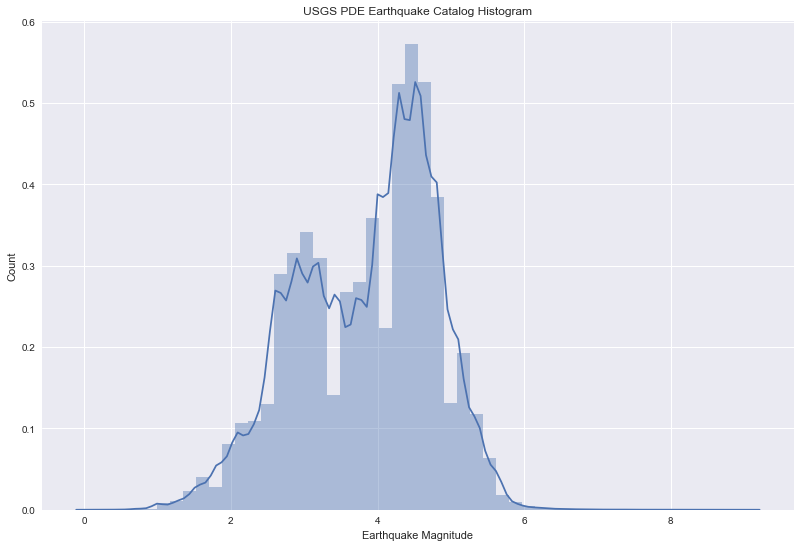

In [21]:
sns.set(rc={'figure.figsize':(12,9)})
f,ax = plt.subplots()
sns.distplot(pde['mag'], bins=50, axlabel ='Earthquake Magnitude (M)')
ax.set_title('USGS PDE Earthquake Catalog Histogram')
ax.set_xlabel('Earthquake Magnitude');
ax.set_ylabel('Count');

In [22]:
pd.crosstab(index=pde['mag'],  # Make a crosstab
                      columns="count")      # Name the count column

col_0,count
mag,
0.10,3
0.20,1
0.30,5
0.40,9
0.50,10
0.60,29
0.70,67
0.80,86
0.90,121


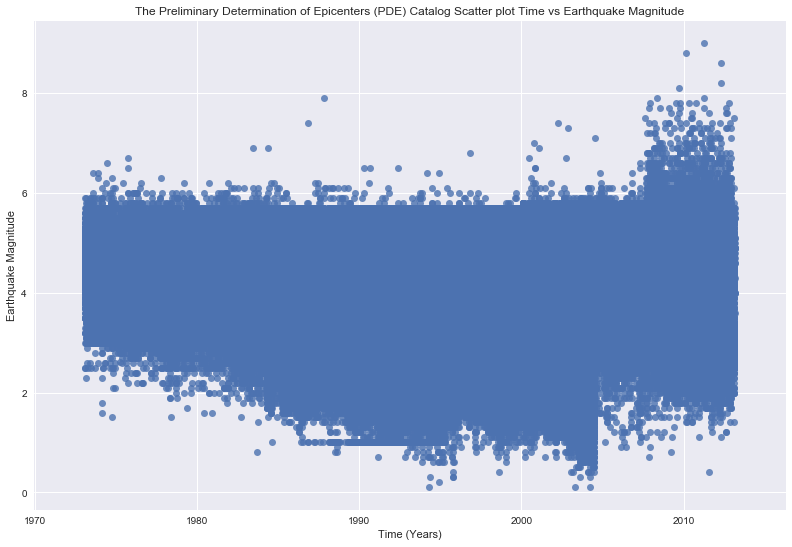

In [23]:
# Scatter plot of Earthquakes vs. Time for The Preliminary Determination of Epicenters (PDE)
 
# Without regression fit:
f,ax = plt.subplots()
sns.regplot(x=pde['FracYear'], y=pde['mag'], fit_reg=False, ax = ax)
ax.set_title('The Preliminary Determination of Epicenters (PDE) Catalog Scatter plot Time vs Earthquake Magnitude')
ax.set_xlabel('Time (Years)');
ax.set_ylabel('Earthquake Magnitude');

In [24]:
pde.head(2)

,Date,ZTime,net,Year,Month,FracYear,Secs_from1973,latitude,longitude,mag
0,01-01-1973,03:46:09,pde,1973,1,1973.076923,13569,-9.214,150.634,5.3
1,01-01-1973,05:22:29,pde,1973,1,1973.076923,19349,-15.012,-173.958,5.0


In [25]:
# Loading the The USGS Earthquake catelog data
usgs = pd.read_csv('./data/RevCatAllM_1900-2016.txt')

In [26]:
usgs = pd.DataFrame(usgs)

In [27]:
usgs.shape

(468582, 22)

In [28]:
usgs.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1987-12-31T23:50:17.520Z,-6.210000,131.410000,33.000,4.70,mb,NaN,NaN,NaN,1.200,us,usp0003bq0,2014-11-07T00:41:25.603Z,"Kepulauan Tanimbar, Indonesia",earthquake,NaN,NaN,NaN,6.0,reviewed,us,us
1,1987-12-31T23:22:09.880Z,37.630333,-121.896500,8.210,1.16,md,11.0,88.0,0.048650,0.060,nc,nc110428,2016-12-07T16:18:28.710Z,"San Francisco Bay area, California",earthquake,0.39,0.730,0.14,10.0,reviewed,nc,nc
2,1987-12-31T23:03:57.160Z,32.981000,-115.855000,5.139,NaN,NaN,0.0,190.1,NaN,0.079,ci,ci740053,2016-02-04T05:30:59.270Z,"23km WSW of Westmorland, CA",earthquake,NaN,0.551,NaN,NaN,reviewed,ci,ci
3,1987-12-31T23:00:03.980Z,38.806333,-122.796000,0.473,1.16,md,5.0,232.0,0.001802,0.020,nc,nc1154595,2016-12-07T16:18:24.866Z,Northern California,earthquake,1.00,0.530,0.37,6.0,reviewed,nc,nc
4,1987-12-31T22:45:03.560Z,36.715167,-120.731667,-0.467,1.52,md,11.0,248.0,0.072070,0.090,nc,nc110426,2016-12-07T16:18:20.723Z,Central California,earthquake,1.68,3.780,0.24,6.0,reviewed,nc,nc


In [29]:

def toYearFraction(date):
    def sinceEpoch(date): # returns seconds since epoch
        return time.mktime(date.timetuple())
    s = sinceEpoch

    year = date.year
    startOfThisYear = dt2(year=year, month=1, day=1)
    startOfNextYear = dt2(year=year+1, month=1, day=1)

    yearElapsed = s(date) - s(startOfThisYear)
    yearDuration = s(startOfNextYear) - s(startOfThisYear)
    fraction = yearElapsed/yearDuration

    return date.year + fraction
# Taken from the following link on June 20th, 2018 2:30pm
# https://stackoverflow.com/questions/6451655/python-how-to-convert-datetime-dates-to-decimal-years

In [30]:
# Converting the datestamp from a string to a time datatype.
usgs['time'] = pd.to_datetime(usgs['time'], infer_datetime_format=True)
#usgs['Date_Number']= pd.to_datetime(usgs['time']).map(dt.datetime.toordinal)

usgs['Date_temp']= pd.to_datetime(usgs['time']).apply(lambda x: toYearFraction(x))
#classmethod datetime.strptime(date_string, format)

# grouping right hand with both so that the classification is left handed = 1 or not left handed = 0.
#data['hand'] = data['hand'].apply(lambda x: 0 if x == 3 or x == 1 else 1)

In [31]:
usgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468582 entries, 0 to 468581
Data columns (total 23 columns):
time               468582 non-null datetime64[ns]
latitude           468582 non-null float64
longitude          468582 non-null float64
depth              468575 non-null float64
mag                407777 non-null float64
magType            407658 non-null object
nst                352263 non-null float64
gap                352029 non-null float64
dmin               262648 non-null float64
rms                416325 non-null float64
net                468582 non-null object
id                 468582 non-null object
updated            468582 non-null object
place              468578 non-null object
type               468582 non-null object
horizontalError    266225 non-null float64
depthError         342652 non-null float64
magError           216235 non-null float64
magNst             353362 non-null float64
status             468582 non-null object
locationSource     468582 non

In [32]:
usgs.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,Date_temp
0,1987-12-31 23:50:17.520,-6.210000,131.410000,33.000,4.70,mb,NaN,NaN,NaN,1.200,us,usp0003bq0,2014-11-07T00:41:25.603Z,"Kepulauan Tanimbar, Indonesia",earthquake,NaN,NaN,NaN,6.0,reviewed,us,us,1987.999982
1,1987-12-31 23:22:09.880,37.630333,-121.896500,8.210,1.16,md,11.0,88.0,0.048650,0.060,nc,nc110428,2016-12-07T16:18:28.710Z,"San Francisco Bay area, California",earthquake,0.39,0.730,0.14,10.0,reviewed,nc,nc,1987.999928
2,1987-12-31 23:03:57.160,32.981000,-115.855000,5.139,NaN,NaN,0.0,190.1,NaN,0.079,ci,ci740053,2016-02-04T05:30:59.270Z,"23km WSW of Westmorland, CA",earthquake,NaN,0.551,NaN,NaN,reviewed,ci,ci,1987.999893
3,1987-12-31 23:00:03.980,38.806333,-122.796000,0.473,1.16,md,5.0,232.0,0.001802,0.020,nc,nc1154595,2016-12-07T16:18:24.866Z,Northern California,earthquake,1.00,0.530,0.37,6.0,reviewed,nc,nc,1987.999886
4,1987-12-31 22:45:03.560,36.715167,-120.731667,-0.467,1.52,md,11.0,248.0,0.072070,0.090,nc,nc110426,2016-12-07T16:18:20.723Z,Central California,earthquake,1.68,3.780,0.24,6.0,reviewed,nc,nc,1987.999857


In [33]:
usgs['mag'].unique();

In [34]:
usgs[usgs['mag'].isnull()]

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,Date_temp
2,1987-12-31 23:03:57.160,32.981000,-115.855000,5.139,NaN,NaN,0.0,190.1,NaN,0.079,ci,ci740053,2016-02-04T05:30:59.270Z,"23km WSW of Westmorland, CA",earthquake,NaN,0.551,NaN,NaN,reviewed,ci,ci,1987.999893
6,1987-12-31 22:36:31.630,35.485000,-118.288000,9.412,NaN,NaN,0.0,114.6,NaN,0.071,ci,ci740051,2016-02-03T21:41:01.500Z,"22km ESE of Bodfish, CA",earthquake,NaN,0.406,NaN,NaN,reviewed,ci,ci,1987.999841
8,1987-12-31 21:49:54.850,39.577000,27.782000,6.400,NaN,NaN,NaN,NaN,NaN,0.700,us,usp0003bpz,2014-11-07T00:41:25.600Z,western Turkey,earthquake,NaN,4.600,NaN,NaN,reviewed,us,us,1987.999752
24,1987-12-31 16:53:05.750,35.912000,-117.749000,6.115,NaN,NaN,0.0,67.8,NaN,0.070,ci,ci740026,2016-02-04T03:35:11.010Z,"14km E of Little Lake, CA",earthquake,NaN,0.051,NaN,NaN,reviewed,ci,ci,1987.999188
26,1987-12-31 16:38:59.400,-31.247000,-68.884000,113.900,NaN,NaN,NaN,NaN,NaN,1.300,us,usp0003bpt,2014-11-07T00:41:25.586Z,"San Juan, Argentina",earthquake,NaN,19.300,NaN,NaN,reviewed,us,us,1987.999161
36,1987-12-31 13:58:59.930,33.481000,-116.566000,10.935,NaN,NaN,0.0,96.7,NaN,0.132,ci,ci740021,2016-02-04T01:38:26.550Z,"13km SE of Anza, CA",earthquake,NaN,0.166,NaN,NaN,reviewed,ci,ci,1987.998857
42,1987-12-31 12:08:46.900,35.913000,-117.747000,6.035,NaN,NaN,0.0,68.1,NaN,0.081,ci,ci740019,2016-02-03T23:00:39.870Z,"15km E of Little Lake, CA",earthquake,NaN,0.032,NaN,NaN,reviewed,ci,ci,1987.998647
49,1987-12-31 11:01:12.600,59.772000,-153.407000,117.000,NaN,NaN,NaN,NaN,NaN,NaN,us,usp0003bpp,2014-11-07T00:41:25.577Z,Southern Alaska,earthquake,NaN,NaN,NaN,NaN,reviewed,ags,us,1987.998518
58,1987-12-31 08:59:59.290,-6.422000,149.599000,33.000,NaN,NaN,NaN,NaN,NaN,1.300,us,usp0003bpm,2014-11-07T00:41:25.573Z,"New Britain region, Papua New Guinea",earthquake,NaN,NaN,NaN,NaN,reviewed,us,us,1987.998288
73,1987-12-31 07:02:35.980,35.980000,-117.927000,4.226,NaN,NaN,0.0,84.7,NaN,0.048,ci,ci740006,2016-02-03T21:41:00.140Z,"5km NNW of Little Lake, CA",earthquake,NaN,0.568,NaN,NaN,reviewed,ci,ci,1987.998064


In [35]:
eq_usgs = usgs[usgs['mag'].notnull()]
eq_usgs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407777 entries, 0 to 468581
Data columns (total 23 columns):
time               407777 non-null datetime64[ns]
latitude           407777 non-null float64
longitude          407777 non-null float64
depth              407770 non-null float64
mag                407777 non-null float64
magType            407658 non-null object
nst                317291 non-null float64
gap                317057 non-null float64
dmin               253135 non-null float64
rms                364405 non-null float64
net                407777 non-null object
id                 407777 non-null object
updated            407777 non-null object
place              407773 non-null object
type               407777 non-null object
horizontalError    261792 non-null float64
depthError         313028 non-null float64
magError           216235 non-null float64
magNst             353362 non-null float64
status             407777 non-null object
locationSource     407777 non

In [36]:
eq_usgs['depth'].isnull().sum()

7

In [37]:
eq_usgs[eq_usgs['depth'].isnull()]

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,Date_temp
432886,1974-12-03 08:25:00.000,33.95,-82.50,NaN,3.6,ml,NaN,NaN,NaN,NaN,us,usp00008zm,2014-11-06T23:21:27.653Z,"Georgia, USA",earthquake,NaN,NaN,NaN,NaN,reviewed,m,csc,1974.921509
433145,1974-11-25 23:34:05.100,40.30,-87.40,NaN,2.4,lg,NaN,NaN,NaN,NaN,us,usp00008ws,2014-11-06T23:21:27.552Z,Indiana,earthquake,NaN,NaN,NaN,NaN,reviewed,j,slm,1974.901321
433751,1974-11-05 03:00:00.000,33.73,-82.22,NaN,3.7,ml,NaN,NaN,NaN,NaN,us,usp00008pg,2014-11-06T23:21:27.157Z,"Georgia, USA",earthquake,NaN,NaN,NaN,NaN,reviewed,m,csc,1974.844178
433962,1974-10-28 11:33:00.000,33.79,-81.92,NaN,3.0,ml,NaN,NaN,NaN,NaN,us,usp00008kh,2014-11-06T23:21:27.052Z,South Carolina,earthquake,NaN,NaN,NaN,NaN,reviewed,m,csc,1974.823236
434498,1974-10-09 20:04:34.000,42.20,-71.50,NaN,1.5,NaN,NaN,NaN,NaN,NaN,us,usp00008bb,2014-11-06T23:21:26.760Z,southern New England,earthquake,NaN,NaN,NaN,NaN,reviewed,c,san,1974.772041
434718,1974-10-01 06:36:21.000,41.70,-71.50,NaN,2.5,ml,NaN,NaN,NaN,NaN,us,usp000087u,2014-11-06T23:21:26.629Z,southern New England,earthquake,NaN,NaN,NaN,NaN,reviewed,c,san,1974.748585
437084,1974-07-14 11:14:38.000,47.60,-120.70,NaN,3.3,NaN,NaN,NaN,NaN,NaN,us,usp0000755,2014-11-06T23:21:25.225Z,Washington,earthquake,NaN,NaN,NaN,NaN,reviewed,w,sea,1974.532676


In [38]:
eq_usgs = eq_usgs[eq_usgs['depth'].notnull()]

In [39]:
eq_usgs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407770 entries, 0 to 468581
Data columns (total 23 columns):
time               407770 non-null datetime64[ns]
latitude           407770 non-null float64
longitude          407770 non-null float64
depth              407770 non-null float64
mag                407770 non-null float64
magType            407653 non-null object
nst                317291 non-null float64
gap                317057 non-null float64
dmin               253135 non-null float64
rms                364405 non-null float64
net                407770 non-null object
id                 407770 non-null object
updated            407770 non-null object
place              407766 non-null object
type               407770 non-null object
horizontalError    261792 non-null float64
depthError         313028 non-null float64
magError           216235 non-null float64
magNst             353362 non-null float64
status             407770 non-null object
locationSource     407770 non

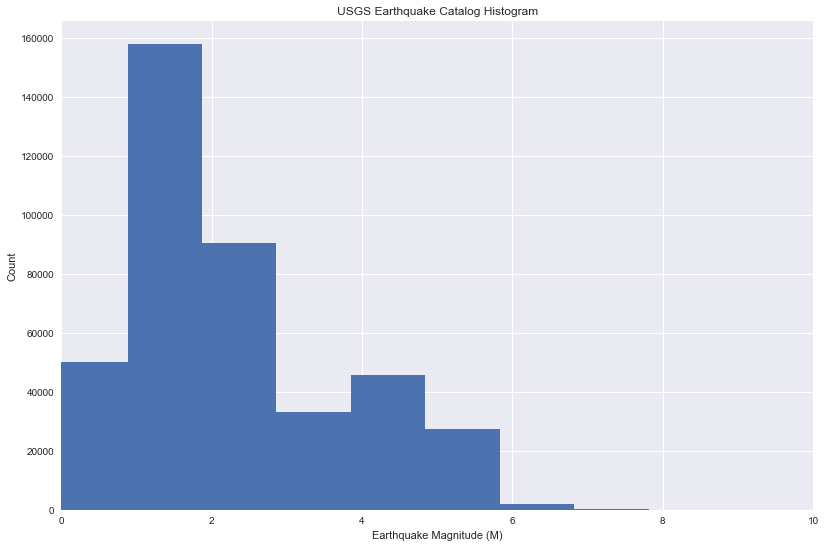

In [40]:
# Histogram 

plt.hist(eq_usgs['mag'])    
# Add title and axis names
plt.title('USGS Earthquake Catalog Histogram')
plt.xlabel('Earthquake Magnitude (M)') #Default is 10 bins
plt.ylabel('Count')
plt.xlim(0,10)

# Show graphic
plt.show()


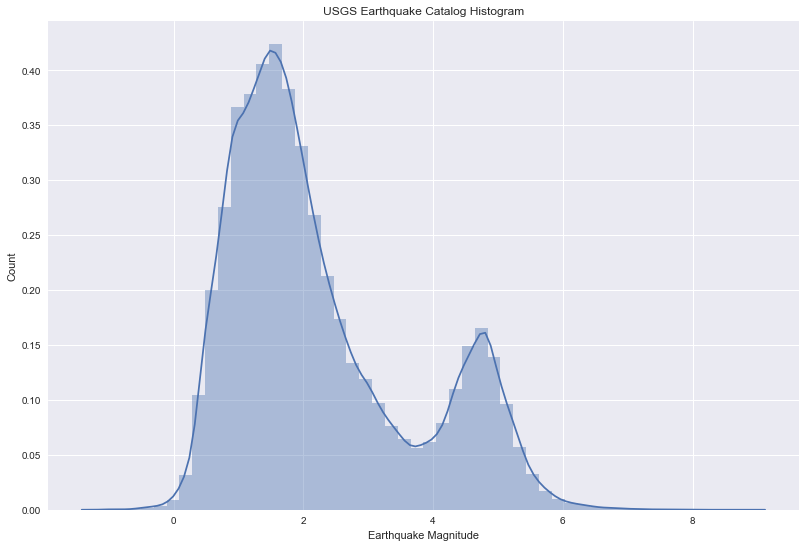

In [41]:
sns.set(rc={'figure.figsize':(12,9)})
f,ax = plt.subplots()
sns.distplot(eq_usgs['mag'], bins=50, axlabel ='Earthquake Magnitude (M)')
ax.set_title('USGS Earthquake Catalog Histogram')
ax.set_xlabel('Earthquake Magnitude');
ax.set_ylabel('Count');

In [42]:
pd.crosstab(index=eq_usgs['mag'],  # Make a crosstab
                      columns="count")      # Name the count column

col_0,count
mag,
-1.10,5
-1.00,26
-0.90,7
-0.80,22
-0.70,7
-0.60,36
-0.50,69
-0.40,89
-0.30,144


In [43]:
place = pd.crosstab(index=eq_usgs['place'],  # Make a crosstab
                      columns="count")      # Name the count column

In [44]:
place

col_0,count
place,
"0km E of Anza, CA",4
"0km E of Compton, CA",1
"0km E of Desert Hot Springs, CA",1
"0km E of El Centro, CA",1
"0km E of Granada Hills, CA",1
"0km E of Guadalupe Victoria, B.C., MX",1
"0km E of Hemet, CA",1
"0km E of Kernville, CA",1
"0km E of Lakewood, CA",1


In [45]:
eq_usgs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407770 entries, 0 to 468581
Data columns (total 23 columns):
time               407770 non-null datetime64[ns]
latitude           407770 non-null float64
longitude          407770 non-null float64
depth              407770 non-null float64
mag                407770 non-null float64
magType            407653 non-null object
nst                317291 non-null float64
gap                317057 non-null float64
dmin               253135 non-null float64
rms                364405 non-null float64
net                407770 non-null object
id                 407770 non-null object
updated            407770 non-null object
place              407766 non-null object
type               407770 non-null object
horizontalError    261792 non-null float64
depthError         313028 non-null float64
magError           216235 non-null float64
magNst             353362 non-null float64
status             407770 non-null object
locationSource     407770 non

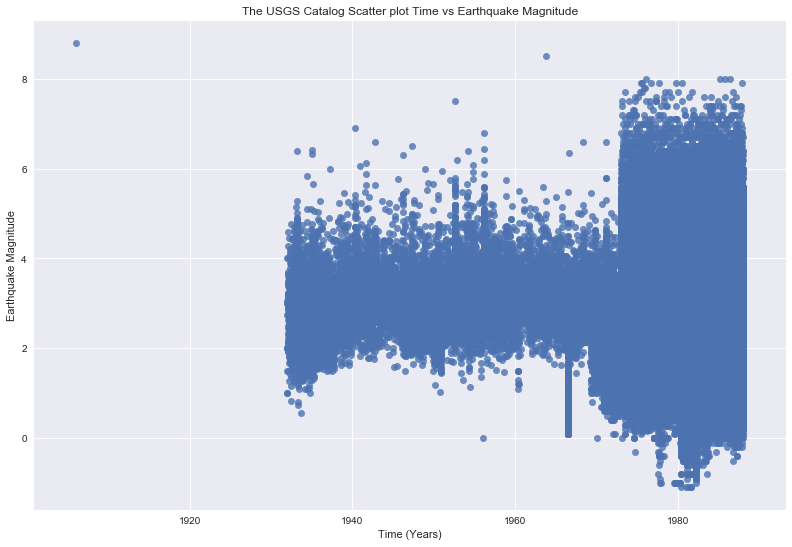

In [46]:
# Scatter plot of Earthquakes vs. Time for The USGS
 
# Without regression fit:
f,ax = plt.subplots()
sns.regplot(x=usgs['Date_temp'], y=usgs['mag'], fit_reg=False, ax = ax)
ax.set_title('The USGS Catalog Scatter plot Time vs Earthquake Magnitude')
ax.set_xlabel('Time (Years)');
ax.set_ylabel('Earthquake Magnitude');

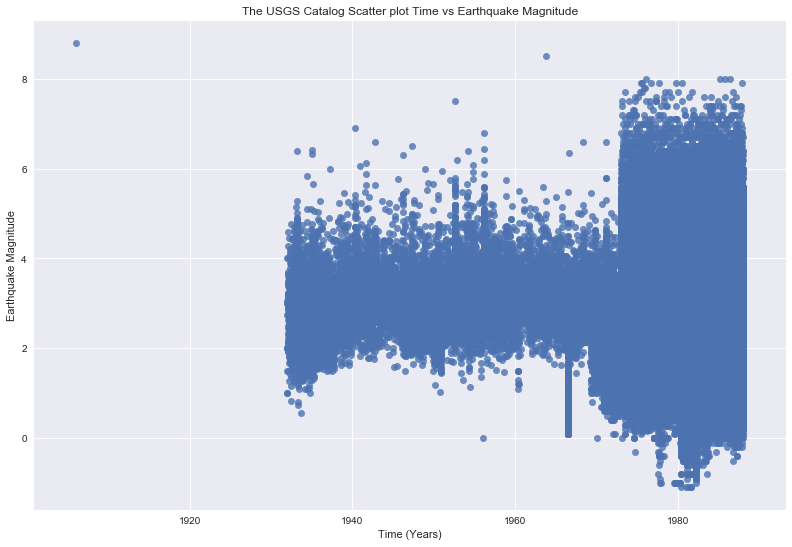

In [47]:
# Scatter plot of Earthquakes vs. Time for The USGS
 
# Without regression fit:
f,ax = plt.subplots()
sns.regplot(x=eq_usgs['Date_temp'], y=eq_usgs['mag'], fit_reg=False, ax = ax)
ax.set_title('The USGS Catalog Scatter plot Time vs Earthquake Magnitude')
ax.set_xlabel('Time (Years)');
ax.set_ylabel('Earthquake Magnitude');

In [48]:
eq_usgs.head(2)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,Date_temp
0,1987-12-31 23:50:17.520,-6.210000,131.4100,33.00,4.70,mb,NaN,NaN,NaN,1.20,us,usp0003bq0,2014-11-07T00:41:25.603Z,"Kepulauan Tanimbar, Indonesia",earthquake,NaN,NaN,NaN,6.0,reviewed,us,us,1987.999982
1,1987-12-31 23:22:09.880,37.630333,-121.8965,8.21,1.16,md,11.0,88.0,0.04865,0.06,nc,nc110428,2016-12-07T16:18:28.710Z,"San Francisco Bay area, California",earthquake,0.39,0.73,0.14,10.0,reviewed,nc,nc,1987.999928


In [70]:
my_cols = ['EVENTID','AUTHOR','DATE','TIME','LAT','LON','DEPTH','DEPFIX',
           'AUTHOR','TYPE','MAG',
           'AUTHOR2','TYPE2','MAG2',
           'AUTHOR3','TYPE3','MAG3',
           'AUTHOR4','TYPE4','MAG4',
           'AUTHOR5','TYPE5','MAG5',
           'AUTHOR6','TYPE6','MAG6',
           'AUTHOR7','TYPE7','MAG7',
           'AUTHOR8','TYPE8','MAG8',
           'AUTHOR9','TYPE9','MAG9',
           'AUTHOR10','TYPE10','MAG10',
           'AUTHOR11','TYPE11','MAG11',
           'AUTHOR12','TYPE12','MAG12',
           'AUTHOR13','TYPE13','MAG13',
           'AUTHOR14','TYPE14','MAG14',
           'AUTHOR15','TYPE15','MAG15',
           'AUTHOR16','TYPE16','MAG16',
           'AUTHOR17','TYPE17','MAG17',
           'AUTHOR18','TYPE18','MAG18',
           'AUTHOR19','TYPE19','MAG19',
           'AUTHOR20','TYPE20','MAG20',
           'AUTHOR21','TYPE21','MAG21',
           'AUTHOR22','TYPE22','MAG22',
           'AUTHOR23','TYPE23','MAG23',
           'AUTHOR24','TYPE24','MAG24',
           'AUTHOR25','TYPE25','MAG25',
           'AUTHOR26','TYPE26','MAG26',
           'AUTHOR27','TYPE27','MAG27',
           'AUTHOR28','TYPE28','MAG28',
           'AUTHOR29','TYPE29','MAG29',
           'AUTHOR30','TYPE30','MAG30',
           'AUTHOR31','TYPE31','MAG31',
           'AUTHOR32','TYPE32','MAG32',
           'AUTHOR33','TYPE33','MAG33',
           'AUTHOR34','TYPE34','MAG34',
           'AUTHOR35','TYPE35','MAG35',
           'AUTHOR36','TYPE36','MAG36',
           'AUTHOR37','TYPE37','MAG37',
           'AUTHOR38','TYPE38','MAG38',
           'AUTHOR39','TYPE39','MAG39',
           'AUTHOR40','TYPE40','MAG40',
           'AUTHOR41','TYPE41','MAG41',
           'AUTHOR42','TYPE42','MAG42',
           'AUTHOR43','TYPE43','MAG43',
           'AUTHOR44','TYPE44','MAG44',
           'AUTHOR45','TYPE45','MAG45',
           'AUTHOR46','TYPE46','MAG46',
           'AUTHOR47','TYPE47','MAG47',
           'AUTHOR48','TYPE48','MAG48',
           'AUTHOR49','TYPE49','MAG49',
           'AUTHOR50','TYPE50','MAG50',
           'AUTHOR51','TYPE51','MAG51',
           'AUTHOR52','TYPE52','MAG52',
           'AUTHOR53','TYPE53','MAG53',
           'AUTHOR54','TYPE54','MAG54',
           'AUTHOR55','TYPE55','MAG55',
           'AUTHOR56','TYPE56','MAG56',
           'AUTHOR57','TYPE57','MAG57',
           'AUTHOR58','TYPE58','MAG58',
           'AUTHOR59','TYPE59','MAG59',
           'AUTHOR60','TYPE60','MAG60',
           'AUTHOR61','TYPE61','MAG61',
           'AUTHOR62','TYPE62','MAG62',
           'AUTHOR63','TYPE63','MAG63',
           'AUTHOR64','TYPE64','MAG64',
           'AUTHOR65','TYPE65','MAG65',
           'AUTHOR66','TYPE66','MAG66',
           'AUTHOR67','TYPE67','MAG67',
           'AUTHOR68','TYPE68','MAG68'] #,'AUTHOR','TYPE','MAG','AUTHOR','TYPE','MAG','AUTHOR','TYPE','MAG','AUTHOR','TYPE','MAG','AUTHOR','TYPE','MAG','AUTHOR','TYPE','MAG','AUTHOR','TYPE','MAG','AUTHOR','TYPE','MAG','AUTHOR','TYPE','MAG','AUTHOR','TYPE','MAG','AUTHOR','TYPE','MAG','AUTHOR','TYPE','MAG','AUTHOR','TYPE','MAG','AUTHOR','TYPE','MAG','AUTHOR','TYPE','MAG','AUTHOR','TYPE','MAG','AUTHOR','TYPE','MAG','AUTHOR','TYPE','MAG','AUTHOR','TYPE','MAG','AUTHOR','TYPE','MAG','AUTHOR','TYPE','MAG','AUTHOR','TYPE','MAG','AUTHOR','TYPE','MAG','AUTHOR','TYPE','MAG','AUTHOR','TYPE','MAG','AUTHOR','TYPE','MAG','AUTHOR','TYPE','MAG','AUTHOR','TYPE','MAG','AUTHOR','TYPE','MAG','AUTHOR','TYPE','MAG','AUTHOR','TYPE','MAG','AUTHOR','TYPE','MAG','AUTHOR','TYPE','MAG','AUTHOR','TYPE','MAG','AUTHOR','TYPE','MAG','AUTHOR','TYPE','MAG','AUTHOR','TYPE','MAG','AUTHOR','TYPE','MAG','AUTHOR','TYPE','MAG','AUTHOR','TYPE','MAG','AUTHOR','TYPE','MAG','AUTHOR','TYPE','MAG','AUTHOR','TYPE','MAG','AUTHOR','TYPE','MAG','AUTHOR','TYPE','MAG','AUTHOR','TYPE','MAG'] # Put list of header names here.

In [84]:
# Loading the ISC Bullitin data, 2nd attempt.
isc = pd.read_csv("./data/ISC_Rev_allM_1904_01-2014_09_noHeaders.txt",names=my_cols, engine='python')

/Users/user/anaconda3/envs/dsi/lib/python3.6/site-packages/pandas/io/parsers.py:709: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


In [85]:
isc = pd.DataFrame(isc)

In [86]:
isc.head()

,EVENTID,AUTHOR,DATE,TIME,LAT,LON,DEPTH,DEPFIX,AUTHOR.1,TYPE,MAG,AUTHOR2,TYPE2,MAG2,AUTHOR3,TYPE3,MAG3,AUTHOR4,TYPE4,MAG4,AUTHOR5,TYPE5,MAG5,AUTHOR6,TYPE6,MAG6,AUTHOR7,TYPE7,MAG7,AUTHOR8,TYPE8,MAG8,AUTHOR9,TYPE9,MAG9,AUTHOR10,TYPE10,MAG10,AUTHOR11,TYPE11,MAG11,AUTHOR12,TYPE12,MAG12,AUTHOR13,TYPE13,MAG13,AUTHOR14,TYPE14,MAG14,AUTHOR15,TYPE15,MAG15,AUTHOR16,TYPE16,MAG16,AUTHOR17,TYPE17,MAG17,AUTHOR18,TYPE18,MAG18,AUTHOR19,TYPE19,MAG19,AUTHOR20,TYPE20,MAG20,AUTHOR21,TYPE21,MAG21,AUTHOR22,TYPE22,MAG22,AUTHOR23,TYPE23,MAG23,AUTHOR24,TYPE24,MAG24,AUTHOR25,TYPE25,MAG25,AUTHOR26,TYPE26,MAG26,AUTHOR27,TYPE27,MAG27,AUTHOR28,TYPE28,MAG28,AUTHOR29,TYPE29,MAG29,AUTHOR30,TYPE30,MAG30,AUTHOR31,TYPE31,MAG31,AUTHOR32,TYPE32,MAG32,AUTHOR33,TYPE33,MAG33,AUTHOR34,TYPE34,MAG34,AUTHOR35,TYPE35,MAG35,AUTHOR36,TYPE36,MAG36,AUTHOR37,TYPE37,MAG37,AUTHOR38,TYPE38,MAG38,AUTHOR39,TYPE39,MAG39,AUTHOR40,TYPE40,MAG40,AUTHOR41,TYPE41,MAG41,AUTHOR42,TYPE42,MAG42,AUTHOR43,TYPE43,MAG43,AUTHOR44,TYPE44,MAG44,AUTHOR45,TYPE45,MAG45,AUTHOR46,TYPE46,MAG46,AUTHOR47,TYPE47,MAG47,AUTHOR48,TYPE48,MAG48,AUTHOR49,TYPE49,MAG49,AUTHOR50,TYPE50,MAG50,AUTHOR51,TYPE51,MAG51,AUTHOR52,TYPE52,MAG52,AUTHOR53,TYPE53,MAG53,AUTHOR54,TYPE54,MAG54,AUTHOR55,TYPE55,MAG55,AUTHOR56,TYPE56,MAG56,AUTHOR57,TYPE57,MAG57,AUTHOR58,TYPE58,MAG58,AUTHOR59,TYPE59,MAG59,AUTHOR60,TYPE60,MAG60,AUTHOR61,TYPE61,MAG61,AUTHOR62,TYPE62,MAG62,AUTHOR63,TYPE63,MAG63,AUTHOR64,TYPE64,MAG64,AUTHOR65,TYPE65,MAG65,AUTHOR66,TYPE66,MAG66,AUTHOR67,TYPE67,MAG67,AUTHOR68,TYPE68,MAG68
0,914299,GUTE,1904-01-20,14:52:06,7.0000,-79.0000,35.0,TRUE,PAS,MS,7.8,ABE1,mB,7.6,AN2,Ms,7.2,P&S,Mw,7.2,GUTE,UK,7.8,PAS,UK,7.9,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16957813,ISC,1904-04-04,10:25:34.15,42.4351,23.4138,15.0,TRUE,PAS,MS,7.5,P&S,Ms,7.0,AN2,Ms,7.1,P&S,Mw,7.1,GUTE,UK,7.5,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,914301,GUTE,1904-06-07,08:17:54,40.0000,134.0000,350.0,,PAS,MS,7.5,ABE1,mB,7.4,UTSU,Mj,7.2,GUTE,UK,7.5,B&D,UK,7.9,PAS,UK,7.9,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None

In [87]:
isc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1835927 entries, 0 to 1835926
Columns: 212 entries, EVENTID to MAG68
dtypes: float64(88), int64(1), object(123)
memory usage: 2.9+ GB


In [88]:
isc.shape

(1835927, 212)

In [90]:
#mag_isc = list(isc['MAG'])
isc['MAG'].unique()

array([ 7.8,  7.5,  8. ,  8.1,  7.9,  7. ,  8.2,  7.2,  6.8,  nan,  8.4,
        6.5,  7.6,  7.4,  6.6,  6.9,  6.7,  7.3,  6.3,  7.1,  6.1,  6.4,
        5.8,  6.2,  7.7,  6. ,  5.6,  5.9,  5.5,  8.6,  8.3,  8.7,  5. ,
        5.2,  5.7,  5.4,  5.3,  3.5,  3.6,  5.1,  3.8,  3. ,  4. ,  4.4,
        3.4,  3.2,  4.2,  3.7,  4.6,  2.9,  4.3,  3.3,  3.1,  4.5,  3.9,
        4.1,  4.8,  2.8,  2.7,  2.6,  4.7,  2.3,  2.5,  4.9,  1. ,  2. ,
        2.4,  1.5,  1.3,  1.2,  1.1,  2.2,  2.1,  1.9,  1.8,  1.4,  1.6,
        1.7,  0.5,  0.3,  0.8,  0. ,  0.6,  0.7,  0.9,  0.2,  0.4,  0.1,
       -0.2, -0.7, -0.3, -0.1, -0.4, -0.5, -0.6, -0.9])

In [91]:
isc['MAG'].isnull().sum()

240820

In [92]:
isc_mag = isc[isc['MAG'].notnull()]

In [93]:
isc_mag.shape

(1595107, 212)

In [83]:
type(isc['MAG'])

pandas.core.series.Series

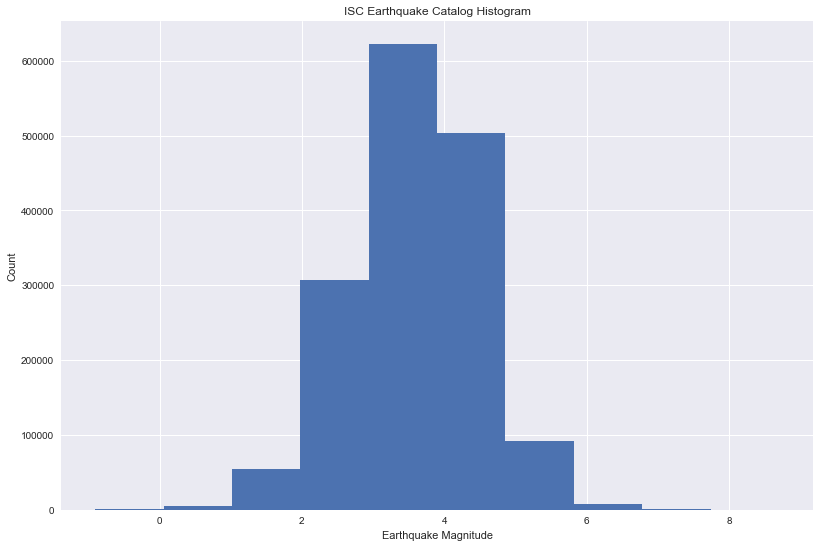

In [94]:
# Histogram 

plt.hist(isc_mag['MAG'])    
# Add title and axis names
plt.title('ISC Earthquake Catalog Histogram')
plt.xlabel('Earthquake Magnitude') #Default is 10 bins
plt.ylabel('Count')
#plt.xlim(0,10)

# Show graphic
plt.show()


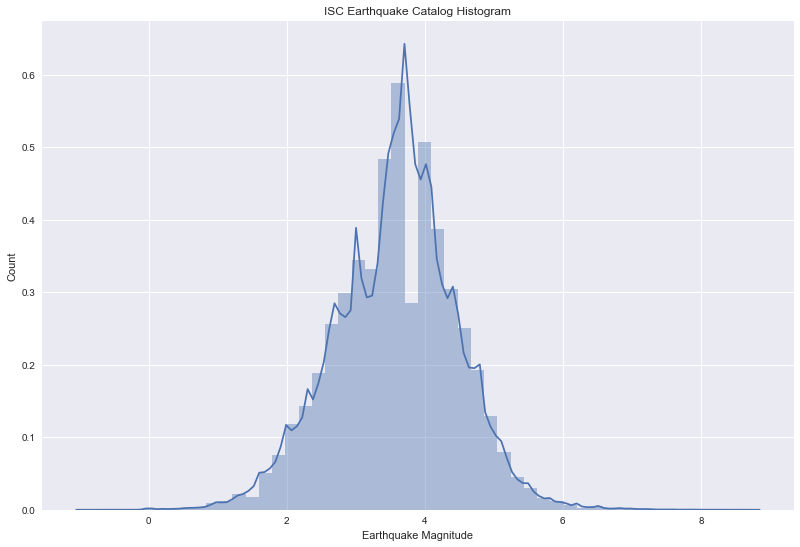

In [95]:
sns.set(rc={'figure.figsize':(12,9)})
f,ax = plt.subplots()
sns.distplot(isc_mag['MAG'], bins=50, axlabel ='Earthquake Magnitude')
ax.set_title('ISC Earthquake Catalog Histogram')
ax.set_xlabel('Earthquake Magnitude');
ax.set_ylabel('Count');

In [96]:
pd.crosstab(index=isc_mag['MAG'],  # Make a crosstab
                      columns="count")      # Name the count column

col_0,count
MAG,
-0.9,1
-0.7,2
-0.6,1
-0.5,2
-0.4,1
-0.3,11
-0.2,6
-0.1,11
0.0,466


In [ ]:
# Scatter plot of Earthquakes vs. Time for The USGS
 
# Without regression fit:
f,ax = plt.subplots()
sns.regplot(x=isc_mag['Date_temp'], y=isc_mag['MAG'], fit_reg=False, ax = ax)
ax.set_title('The ISC Catalog Scatter plot Time vs Earthquake Magnitude')
ax.set_xlabel('Time (Years)');
ax.set_ylabel('Earthquake Magnitude');

In [21]:
# Loading the ISSN_M_tot data
ISSN_M_tot = pd.read_csv('./ISSN_M_tot.csv')

In [22]:
ISSN_M_tot = pd.DataFrame(ISSN_M_tot)

In [23]:
len(ISSN_M_tot)

3193

In [24]:
ISSN_M_tot.head()

,1749,01,1749.049,58.0,1,-1.0,1.1
0,1749,2,1749.129,62.6,1,-1.0,1
1,1749,3,1749.210,70.0,1,-1.0,1
2,1749,4,1749.294,55.7,1,-1.0,1
3,1749,5,1749.377,85.0,1,-1.0,1
4,1749,6,1749.461,83.5,1,-1.0,1


In [25]:
# Loading the ISSN_D_tot data
ISSN_D_tot = pd.read_csv('./ISSN_D_tot.csv')

In [26]:
ISSN_D_tot = pd.DataFrame(ISSN_D_tot)

In [27]:
len(ISSN_D_tot)

72011

In [28]:
ISSN_D_tot.head()

,1818,01,01.1,1818.004,-1,1
0,1818,1,2,1818.007,-1,1
1,1818,1,3,1818.010,-1,1
2,1818,1,4,1818.012,-1,1
3,1818,1,5,1818.015,-1,1
4,1818,1,6,1818.018,-1,1


In [31]:
# Loading the ISSN_Y_tot data
ISSN_Y_tot = pd.read_csv('./ISSN_Y_tot.csv')

In [32]:
ISSN_Y_tot = pd.DataFrame(ISSN_Y_tot)

In [33]:
len(ISSN_Y_tot)

314

In [34]:
ISSN_Y_tot.head()

,1700.5,5.0,1
0,1701.5,11.0,1
1,1702.5,16.0,1
2,1703.5,23.0,1
3,1704.5,36.0,1
4,1705.5,58.0,1
